# Vanguard AB Test Project ✨

### Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [2]:
client_df = pd.read_csv(r'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt')
web_df1 = pd.read_csv(r'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt')
web_df2 = pd.read_csv(r'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt')
experiment_df = pd.read_csv(r'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt')

### EDA Exploration

In [3]:
client_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [4]:
client_df.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [5]:
#Concatenating both digital footprints' dataframes so the information is consolidated
final_web_df = pd.concat([web_df1, web_df2], axis=0, ignore_index=True)
final_web_df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [6]:
experiment_df

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


### Data Cleaning

In [7]:
#Replacing a few column names for better visibility
client_df.rename(columns={'clnt_tenure_yr': 'tenure_year', 'clnt_tenure_mnth': 'tenure_month', 'clnt_age': 'age', 'gendr': 'gender', 'bal': 'total_balance'}, inplace=True)
print(client_df.columns)

Index(['client_id', 'tenure_year', 'tenure_month', 'age', 'gender',
       'num_accts', 'total_balance', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')


In [8]:
#Transforming the columns so they all have the same format
experiment_df.columns = [col.strip().lower() for col in experiment_df]
print(experiment_df.columns)

Index(['client_id', 'variation'], dtype='object')


In [9]:
client_df.duplicated().any()

np.False_

In [10]:
experiment_df.duplicated().any()

np.False_

In [11]:
final_web_df.duplicated().any()

np.True_

In [12]:
print(final_web_df.duplicated().sum()) 

10764


In [13]:
final_web_df = final_web_df.drop_duplicates()

In [14]:
print(final_web_df.columns,experiment_df.columns,client_df.columns)

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object') Index(['client_id', 'variation'], dtype='object') Index(['client_id', 'tenure_year', 'tenure_month', 'age', 'gender',
       'num_accts', 'total_balance', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')


###  Primary Client, Young or Old

In [15]:

# Combining Tenure Columns
if "tenure_year" in client_df.columns and "tenure_month" in client_df.columns:
    client_df["client_tenure"] = client_df["tenure_year"] + (client_df["tenure_month"] / 12.0)
    print("\nSample of newly created 'client_tenure' column:")
    print(client_df[["client_id", "tenure_year", "tenure_month", "client_tenure"]].head())
else:
    print("Cannot create 'client_tenure' because 'tenure_year' or 'tenure_month' is missing.")


Sample of newly created 'client_tenure' column:
   client_id  tenure_year  tenure_month  client_tenure
0     836976          6.0          73.0      12.083333
1    2304905          7.0          94.0      14.833333
2    1439522          5.0          64.0      10.333333
3    1562045         16.0         198.0      32.500000
4    5126305         12.0         145.0      24.083333


In [16]:
#  Bin and Analyze the client_tenure Column
if "client_tenure" in client_df.columns:
    print("\n=== Client Tenure Analysis ===")

    # Descriptive Stats
    print(client_df["client_tenure"].describe())

    # Create Bins for Tenure (in years)
    client_df["tenure_group"] = pd.cut(
        client_df["client_tenure"],
        bins=[0, 2, 5, 10, 20, 50],
        labels=["<2 yrs", "2-5 yrs", "5-10 yrs", "10-20 yrs", "20+ yrs"]
    )
    # Check distribution
    print("\nTenure Group Counts:")
    print(client_df["tenure_group"].value_counts(dropna=False))


=== Client Tenure Analysis ===
count    70595.000000
mean        24.607897
std         13.708990
min          4.750000
25%         12.833333
50%         22.333333
75%         32.000000
max        124.416667
Name: client_tenure, dtype: float64

Tenure Group Counts:
tenure_group
20+ yrs      34845
10-20 yrs    26007
5-10 yrs      5792
NaN           3884
2-5 yrs         81
<2 yrs           0
Name: count, dtype: int64


C:\Users\biave\AppData\Local\Temp\ipykernel_13960\958242277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="tenure_group", data=client_df, palette="magma")


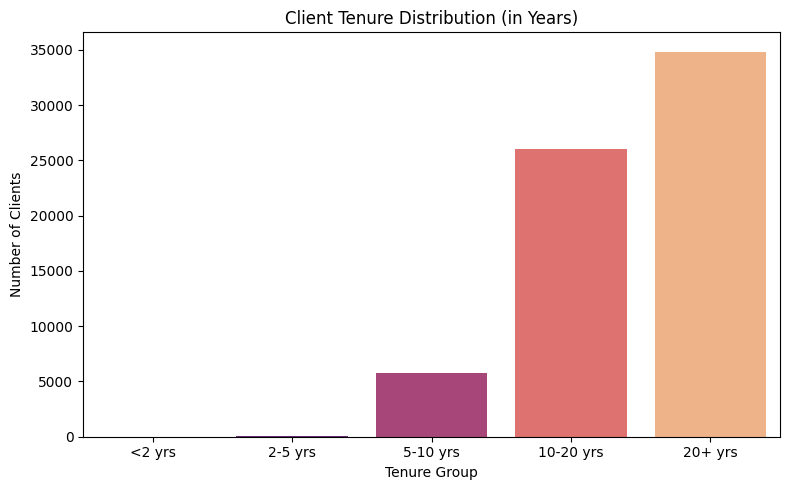

In [17]:
    # Ploting a Bar Chart of Tenure Groups
    plt.figure(figsize=(8, 5))
    sns.countplot(x="tenure_group", data=client_df, palette="magma")
    plt.title("Client Tenure Distribution (in Years)")
    plt.xlabel("Tenure Group")
    plt.ylabel("Number of Clients")
    plt.tight_layout()
    plt.show()


Sample of newly created 'tenure_label' column:
   client_id  client_tenure tenure_label
0     836976      12.083333          Old
1    2304905      14.833333          Old
2    1439522      10.333333          Old
3    1562045      32.500000          Old
4    5126305      24.083333          Old

Young vs. Old Counts:
tenure_label
Old      70528
Young       81
Name: count, dtype: int64


C:\Users\biave\AppData\Local\Temp\ipykernel_13960\1978624365.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="tenure_label", data=client_df, palette="viridis")


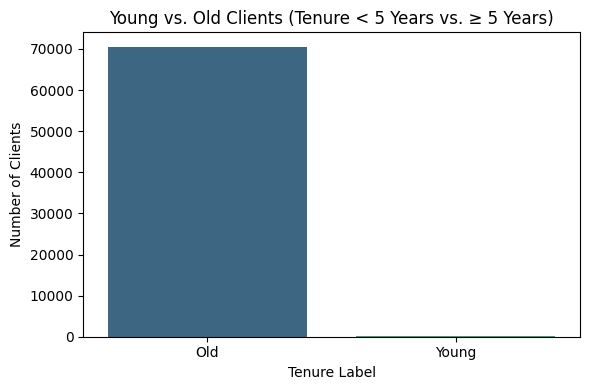

In [18]:
    # Classify Clients as 'Young' or 'Old' Based on Tenure
    client_df["tenure_label"] = client_df["client_tenure"].apply(
        lambda x: "Young" if x < 5 else "Old"
    )

    print("\nSample of newly created 'tenure_label' column:")
    print(client_df[["client_id", "client_tenure", "tenure_label"]].head())

    # Check the distribution of Young vs. Old
    print("\nYoung vs. Old Counts:")
    print(client_df["tenure_label"].value_counts(dropna=False))
 # Ploting a Bar Chart of Young vs. Old Clients
    plt.figure(figsize=(6, 4))
    sns.countplot(x="tenure_label", data=client_df, palette="viridis")
    plt.title("Young vs. Old Clients (Tenure < 5 Years vs. ≥ 5 Years)")
    plt.xlabel("Tenure Label")
    plt.ylabel("Number of Clients")
    plt.tight_layout()
    plt.show()


## KPIs

### Completion Rate

In [19]:
final_web_df['process_step'].value_counts()

process_step
start      234999
step_1     162797
step_2     132750
step_3     111589
confirm    102506
Name: count, dtype: int64

In [20]:
#Counting the amount of duplicates there are in the final_web_df in regards to client_id
print(f"The amount of duplicated Client IDs in the original DF is: {final_web_df['client_id'].duplicated().sum()}")

#Filtering the data to only show the user's that have reached the confirm step
confirm_df = final_web_df[final_web_df['process_step'] == 'confirm']
confirm_df

#After looking at the table I was able to assess that the users can hit the confirm step multiple times so I decided to check the duplicates
print(f"The amount of duplicates for the 'Confirm' step based on Client IDs is: {confirm_df['client_id'].duplicated().sum()}")

#I realized I need to drop the duplicates or I'll be counting not only the users but also the amount of times they have reached the confirm step
confirm_updated = confirm_df.drop_duplicates(subset='client_id', keep='first')
confirm_updated['client_id'].value_counts().sum()
print(f"The amount of users who reached the 'Confirm' step is: {confirm_updated['client_id'].value_counts().sum()}")

The amount of duplicated Client IDs in the original DF is: 624484
The amount of duplicates for the 'Confirm' step based on Client IDs is: 21361
The amount of users who reached the 'Confirm' step is: 81145


In [21]:
# Merging the experiment_df and the confirm_updated dataframe showing only the users who have hit confirm
confirm_merged = pd.merge(experiment_df, confirm_updated, on='client_id', how='inner')
confirm_merged

,client_id,variation,visitor_id,visit_id,process_step,date_time
0,8320017,Test,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
1,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03
2,1982004,Test,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17 12:02:42
3,3170143,Test,837774974_91015515080,758001412_25057963943_219559,confirm,2017-04-04 18:41:44
4,6651403,Control,387438258_49845138949,754106292_61370647593_160929,confirm,2017-04-04 17:38:39
...,...,...,...,...,...,...
47795,9722009,NaN,315897436_78057862622,361383806_64671399344_414117,confirm,2017-04-05 16:45:06
47796,2443347,NaN,465784886_73090545671,29485110_67112661133_270151,confirm,2017-04-03 16:15:56
47797,8788427,NaN,897419406_91053100530,204300161_33122850691_734102,confirm,2017-04-12 16:57:17
47798,266828,NaN,140157234_42535034872,95646321_25965124122_458073,confirm,2017-04-13 10:02:33


In [22]:
# The amount of clients that are in the Test(new design) and Control(old design) regardless if they reached the confirm step
experiment_df['variation'].value_counts() 

variation
Test       26968
Control    23532
Name: count, dtype: int64

In [23]:
# Double checking for duplicate values in terms of client_id
experiment_df['client_id'].duplicated().sum()

np.int64(0)

In [24]:
# The amount of clients who are in the Test(new design) and Control(old design) but who have reached the confirm step
confirm_merged['variation'].value_counts() 

variation
Test       18687
Control    15434
Name: count, dtype: int64

In [25]:
#Counting how many test users there are using the original dataframe as the merged df only has the confirm step
test_users = (experiment_df['variation'] == 'Test').sum()
print(f'The number of Test users is: {test_users}')

#Counting how many test users reached confirm
test_completions = confirm_merged[(confirm_merged['variation'] == 'Test')].shape[0]
print(f'The number of Test users reaching Confirm is: {test_completions}')

#Couting the percentage of completion rate
test_rate = test_completions / (test_users.sum()) 
print(f'The Completion Rate for Test users is: {(test_rate * 100).round(2)}%')


The number of Test users is: 26968
The number of Test users reaching Confirm is: 18687
The Completion Rate for Test users is: 69.29%


In [26]:
#Counting how many control users there are using the original dataframe as the merged df only has the confirm step
control_users = (experiment_df['variation'] == 'Control').sum()
print(f'The number of Control users is: {control_users}')

#Counting how many control users reached confirm
control_completions = confirm_merged[(confirm_merged['variation'] == 'Control')].shape[0]
print(f'The number of Control users reaching Confirm is: {control_completions}')

#Couting the percentage of completion rate
control_rate = control_completions / (control_users.sum())
print(f'The Completion Rate for Control users is: {(control_rate* 100).round(2)}%')


The number of Control users is: 23532
The number of Control users reaching Confirm is: 15434
The Completion Rate for Control users is: 65.59%


In [27]:
# List of required steps
required_steps = ['confirm']
# Group by client_id and visit_id and collect the completed steps into a set
steps_check = (
    final_web_df
    .groupby(['client_id', 'visit_id'])['process_step']
    .apply(set)  # Converts the completed steps into a set
    .reset_index(name='steps_set')  # Names the new column as 'steps_set'
)
# Check if all required steps are present
steps_check['all_steps_completed'] = steps_check['steps_set'].apply(
    lambda x: set(required_steps).issubset(x)
)
# Display the results
print(steps_check)

        client_id                      visit_id  \
0             169  749567106_99161211863_557568   
1             336  649044751_80905125055_554468   
2             546    731811517_9330176838_94847   
3             555  637149525_38041617439_716659   
4             647   40369564_40101682850_311847   
...           ...                           ...   
159107    9999729   99583652_41711450505_426179   
159108    9999768   85676722_11636430786_122704   
159109    9999832  472154369_16714624241_585315   
159110    9999839  715530422_68620416793_515645   
159111    9999875    931268933_219402947_599432   

                                       steps_set  all_steps_completed  
0       {start, confirm, step_3, step_1, step_2}                 True  
1                                        {start}                False  
2       {start, confirm, step_3, step_1, step_2}                 True  
3       {start, confirm, step_3, step_1, step_2}                 True  
4       {start, confirm, st

In [28]:
# If you want to filter the rows where the client has completed all the steps, you can do something like this:
completed_steps = steps_check[steps_check['all_steps_completed'] == True]
print(completed_steps)

        client_id                      visit_id  \
0             169  749567106_99161211863_557568   
2             546    731811517_9330176838_94847   
3             555  637149525_38041617439_716659   
4             647   40369564_40101682850_311847   
5             722  984487154_55831795985_521110   
...           ...                           ...   
159102    9999451  611106889_67993488256_946460   
159106    9999729  870243567_56915814033_814203   
159108    9999768   85676722_11636430786_122704   
159110    9999839  715530422_68620416793_515645   
159111    9999875    931268933_219402947_599432   

                                       steps_set  all_steps_completed  
0       {start, confirm, step_3, step_1, step_2}                 True  
2       {start, confirm, step_3, step_1, step_2}                 True  
3       {start, confirm, step_3, step_1, step_2}                 True  
4       {start, confirm, step_3, step_1, step_2}                 True  
5       {start, confirm, st

C:\Users\biave\AppData\Local\Temp\ipykernel_13960\2726519251.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vis = sns.barplot(x=group_names, y=completion_rates, palette=sns.color_palette(["#6c9ea5", "#f5d6b3"]))


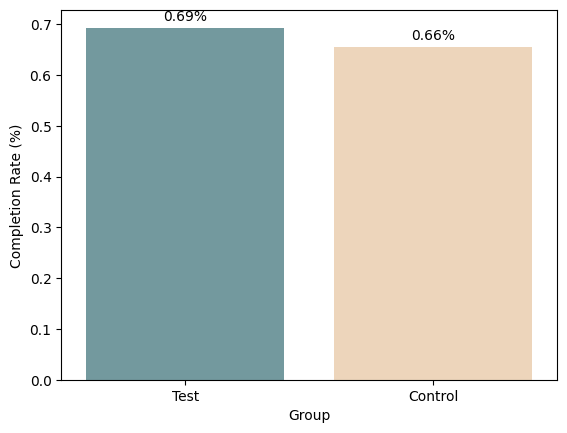

In [29]:
group_names = ['Test', 'Control']
completion_rates = [test_rate, control_rate]
vis = sns.barplot(x=group_names, y=completion_rates, palette=sns.color_palette(["#6c9ea5", "#f5d6b3"]))

vis.set_xlabel('Group')
vis.set_ylabel('Completion Rate (%)')

for i in vis.containers:
    vis.bar_label(i, labels=[f'{v.get_height():.2f}%' for v in i], padding=3)

In [30]:
# On one hand the Test group, we observed a total of 26,968 users, out of these 18,687 reached the 'Confirm' step, resulting in a completion rate of 69.29%. 
# On the other hand, the Control group had 23,532 users, with 15,434 reaching the 'Confirm' step, corresponding to a completion rate of 65.59%. 
# The higher completion rate in the Test group indicates a potential improvement in comparison to the old design.

### Time Spent on Each Step

In [31]:
# Merging both dataframes so I can see the variation together with the clients' digital footprint
visit_tracker = pd.merge(final_web_df, experiment_df, on='client_id', how='outer')
visit_tracker

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,NaN
1,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,NaN
2,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,NaN
3,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,NaN
4,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,NaN
...,...,...,...,...,...,...
744636,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,NaN
744637,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,NaN
744638,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,NaN
744639,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,NaN


In [32]:
#Sorting the values by client_id and date_time so it's easier to then calculate the time spent on each step
visit_tracker = visit_tracker.sort_values(by=['client_id', 'date_time'])


In [33]:
#Filtering out the null values in the variation column
visit_tracker = visit_tracker[visit_tracker['variation'].notna()]

In [34]:
#Checking if there are still any null values
visit_tracker['variation'].isna().sum()

np.int64(0)

In [35]:
visit_df = visit_tracker.copy()

In [36]:
#Converting the date_time column to datetime so I can make sure the values are all in the same format
visit_df['date_time'] = pd.to_datetime(visit_df['date_time'])
visit_df

,client_id,visitor_id,visit_id,process_step,date_time,variation
16,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test
15,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test
14,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test
13,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test
12,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test
...,...,...,...,...,...,...
744612,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test
744611,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test
744610,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test
744628,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test


In [37]:
#Creating a new column with the amount of time taken in each step by using a group by and the diff function
visit_df['time_diff'] = visit_df.groupby(['client_id','visit_id'])['date_time'].diff()
visit_df

,client_id,visitor_id,visit_id,process_step,date_time,variation,time_diff
16,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,NaT
15,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,0 days 00:00:07
14,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,0 days 00:00:32
13,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,0 days 00:01:39
12,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,0 days 00:00:20
...,...,...,...,...,...,...,...
744612,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,0 days 00:00:10
744611,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,0 days 00:00:39
744610,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,0 days 00:00:21
744628,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,NaT


In [38]:
#Filtering out any null values in the time_diff column so I can calculate the average
visit_df = visit_df[visit_df['time_diff'].notna()]
visit_df

,client_id,visitor_id,visit_id,process_step,date_time,variation,time_diff
15,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,0 days 00:00:07
14,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,0 days 00:00:32
13,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,0 days 00:01:39
12,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,0 days 00:00:20
20,647,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,Test,0 days 00:00:07
...,...,...,...,...,...,...,...
744613,9999729,834634258_21862004160,870243567_56915814033_814203,step_1,2017-05-08 16:08:30,Test,0 days 00:00:05
744612,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,0 days 00:00:10
744611,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,0 days 00:00:39
744610,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,0 days 00:00:21


In [39]:
#Calculating the average per step in regards to both variation groups
avg_per_step = visit_df.groupby(['variation', 'process_step'])[['time_diff']].mean().reset_index()
avg_per_step

,variation,process_step,time_diff
0,Control,confirm,0 days 00:02:09.976828385
1,Control,start,0 days 00:02:54.667587922
2,Control,step_1,0 days 00:00:43.180969957
3,Control,step_2,0 days 00:00:38.838146459
4,Control,step_3,0 days 00:01:34.159650694
5,Test,confirm,0 days 00:02:09.476992345
6,Test,start,0 days 00:02:31.680973762
7,Test,step_1,0 days 00:00:37.804657348
8,Test,step_2,0 days 00:00:48.272585264
9,Test,step_3,0 days 00:01:37.356254658


In [40]:
avg_per_step['time_diff_seconds'] = avg_per_step['time_diff'].dt.total_seconds()
avg_per_step

,variation,process_step,time_diff,time_diff_seconds
0,Control,confirm,0 days 00:02:09.976828385,129.976828
1,Control,start,0 days 00:02:54.667587922,174.667588
2,Control,step_1,0 days 00:00:43.180969957,43.180970
3,Control,step_2,0 days 00:00:38.838146459,38.838146
4,Control,step_3,0 days 00:01:34.159650694,94.159651
5,Test,confirm,0 days 00:02:09.476992345,129.476992
6,Test,start,0 days 00:02:31.680973762,151.680974
7,Test,step_1,0 days 00:00:37.804657348,37.804657
8,Test,step_2,0 days 00:00:48.272585264,48.272585
9,Test,step_3,0 days 00:01:37.356254658,97.356255


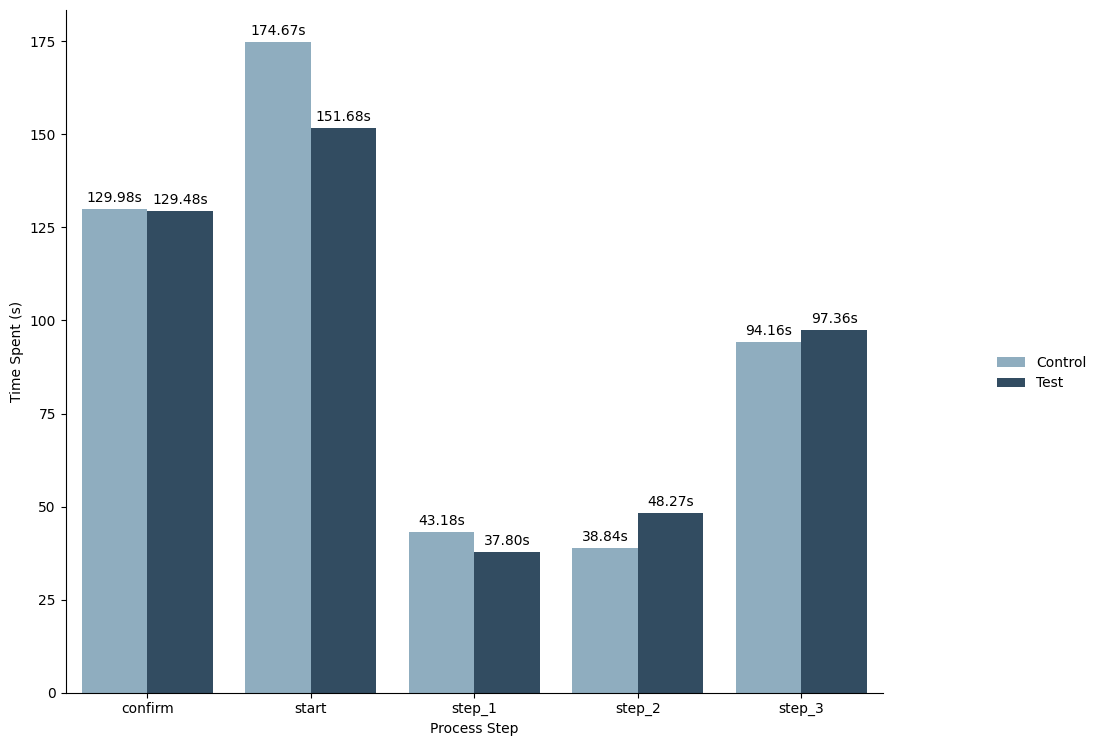

In [41]:
avg_step_vis = sns.catplot(
    data=avg_per_step, 
    kind='bar', 
    x='process_step', 
    y='time_diff_seconds', 
    hue='variation', 
    palette=sns.color_palette(["#87AFC7", "#2A4D69"])
)
avg_step_vis.set_axis_labels("Process Step", "Time Spent (s)")
avg_step_vis.legend.set_title("")

for ax in avg_step_vis.axes.flat:
    for container in ax.containers:
        ax.bar_label(
            container, 
            labels=[f'{v.get_height():.2f}s' for v in container],
            label_type='edge',
            padding=3,
               
)
avg_step_vis.fig.set_size_inches(12, 8)

### Error Rates

In [42]:
visit_tracker

,client_id,visitor_id,visit_id,process_step,date_time,variation
16,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test
15,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test
14,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test
13,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test
12,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test
...,...,...,...,...,...,...
744612,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test
744611,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test
744610,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test
744628,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test


In [43]:
#Making a copy of the merged DF since I'll be adding new columns later
error_df = visit_tracker.copy()

In [44]:
#Creating a dictionary with the steps converted to numbers and mapping them in a different column
steps = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
error_df['step_order'] = error_df['process_step'].map(steps)
error_df

,client_id,visitor_id,visit_id,process_step,date_time,variation,step_order
16,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,0
15,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,1
14,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,2
13,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,3
12,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,4
...,...,...,...,...,...,...,...
744612,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,2
744611,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,3
744610,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,4
744628,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,0


In [45]:
#Creating a new column called previous_step that will let me know which step was the previous one comparing it with the step order
error_df['previous_step'] = error_df.groupby(['client_id', 'visit_id'])['step_order'].shift(1)
error_df

,client_id,visitor_id,visit_id,process_step,date_time,variation,step_order,previous_step
16,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,0,NaN
15,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,1,0.0
14,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,2,1.0
13,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,3,2.0
12,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,4,3.0
...,...,...,...,...,...,...,...,...
744612,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,2,1.0
744611,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,3,2.0
744610,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,4,3.0
744628,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,0,NaN


In [46]:
#Creating a new column that will print out a boolean - False if the user didn't go to a previous step and True if they did
#The previous step should always be lower than the step_order, otherwise it means the user went backwards
error_df['error_instance'] = error_df['step_order'] < error_df['previous_step']
error_df

,client_id,visitor_id,visit_id,process_step,date_time,variation,step_order,previous_step,error_instance
16,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,0,NaN,False
15,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,1,0.0,False
14,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,2,1.0,False
13,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,3,2.0,False
12,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,4,3.0,False
...,...,...,...,...,...,...,...,...,...
744612,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,2,1.0,False
744611,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,3,2.0,False
744610,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,4,3.0,False
744628,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,0,NaN,False


In [47]:
total_test_steps = error_df[error_df['variation'] == 'Test'].shape[0]
total_test_steps
print(f'The total steps taken by Test users is: {total_test_steps}')

total_error_rate_test = error_df[(error_df['variation'] == 'Test') & (error_df['error_instance'] == True)].value_counts().sum()
total_error_rate_test
print(f'The number of backward steps taken by Test users is: {total_error_rate_test}')

error_rate_test = ((total_error_rate_test / total_test_steps) * 100).round(2)
error_rate_test
print(f'The Error Rate for Test users is: {error_rate_test}%')


The total steps taken by Test users is: 176699
The number of backward steps taken by Test users is: 16232
The Error Rate for Test users is: 9.19%


In [48]:
total_control_steps = error_df[error_df['variation'] == 'Control'].shape[0]
total_control_steps
print(f'The total steps taken by Control users is: {total_control_steps}')

total_error_rate_control = error_df[(error_df['variation'] == 'Control') & (error_df['error_instance'] == True)].value_counts().sum()
total_error_rate_control
print(f'The number of backward steps taken by Control users is: {total_error_rate_control}')

error_rate_control = ((total_error_rate_control / total_control_steps) * 100).round(2)
error_rate_control
print(f'The Error Rate for Control users is: {error_rate_control}%')

The total steps taken by Control users is: 140536
The number of backward steps taken by Control users is: 9581
The Error Rate for Control users is: 6.82%


C:\Users\biave\AppData\Local\Temp\ipykernel_13960\1024619964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  error_vis = sns.barplot(x=error_groups, y=error_rates, palette=sns.color_palette(["#6c9ea5", "#f5d6b3"]))


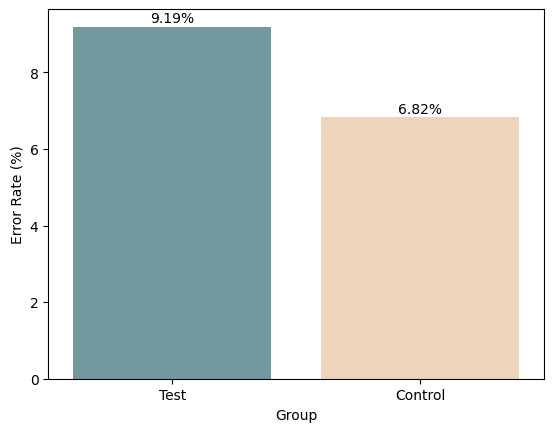

In [49]:
error_groups = ['Test', 'Control']
error_rates = [error_rate_test, error_rate_control]
error_vis = sns.barplot(x=error_groups, y=error_rates, palette=sns.color_palette(["#6c9ea5", "#f5d6b3"]))

error_vis.set_xlabel('Group')
error_vis.set_ylabel('Error Rate (%)')

for i in error_vis.containers:
    error_vis.bar_label(i, labels=[f'{v.get_height():.2f}%' for v in i], padding=1)

## Hypothesis Testing

### Completion Rate

In [50]:
#H0 - The completion rate for the Test group (new design) is equal to the completion rate for the Control group (old design).
#H1 - The completion rate for the Test group (new design) is not equal to the completion rate for the Control group (old design).

#H0 - test_rate == control_rate
#H1 - test_rate != control_rate

In [51]:
import scipy.stats as st
import math
from scipy.stats import norm

In [52]:
print(test_users)
print(control_users)
print(test_completions)
print(control_completions)
print(test_rate)
print(control_rate)

26968
23532
18687
15434
0.6929323642835954
0.6558728539860615


In [53]:
#Choosing a significance level
alpha = 0.05

#Collect the Data
#Sample size for both groups and the successes
test_users
test_completions
control_users
control_completions

#Calculating the number of successes
x_test = test_rate * test_users
x_control = control_rate * control_users

#Calculating Pooled Proportion (which assumes that both rates are equal)
pooled_p = (test_completions + control_completions) / (test_users + control_users)
print (f'The Pooled Proportion is: {pooled_p}')

#Calculating the Standard Error to calculate the Z-Statistic
SE = math.sqrt(pooled_p * (1 - pooled_p) * (1/test_users + 1/control_users))
z = (test_rate - control_rate) / SE
SE, z
print (f'The Standard Error is: {SE}')
print (f'The Z-Statistic is: {z}')

#Calculating the p-value
p_value = 2 * (1 - norm.cdf(abs(z)))
p_value
print (f'The P-Value is: {p_value}')

The Pooled Proportion is: 0.6756633663366337
The Standard Error is: 0.004175948058449906
The Z-Statistic is: 8.8745141890702
The P-Value is: 0.0


In [54]:
#Decision based on significance level (alpha = 0.05)
if p_value < alpha:
    print("Reject the null hypothesis. The completion rates are significantly different.")
else:
    print("Fail to reject the null hypothesis. The completion rates are not significantly different.")

Reject the null hypothesis. The completion rates are significantly different.


### Cost-Effectiveness Threshold

In [55]:
X_control = 300    # Number of completions in Control
n_control = 1000   # Total observations in Control

X_treatment = 350  # Number of completions in Treatment
n_treatment = 1000 # Total observations in Treatment

# Calculating observed completion rates and difference
p_control = X_control / n_control
p_treatment = X_treatment / n_treatment
observed_diff = p_treatment - p_control

print(f"Control Completion Rate: {p_control:.3f}")
print(f"Treatment Completion Rate: {p_treatment:.3f}")
print(f"Observed Difference: {observed_diff:.3%}")

# One-Sided Z-Test for Two Proportions

# Null hypothesis (H0): (p_treatment - p_control) <= 0.05
# Alternative hypothesis (Ha): (p_treatment - p_control) > 0.05

counts = np.array([X_treatment, X_control])   # successes
nobs   = np.array([n_treatment, n_control])   # trials

# 'value=0.05' -> testing if the difference is more than 5%.
# 'alternative="larger"' -> one-sided test (right tail).
z_stat, p_value = proportions_ztest(counts, nobs, value=0.05, alternative='larger')

print(f"\nZ-statistic: {z_stat:.4f}")
print(f"One-sided p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Conclusion: The improvement is significantly above the 5% threshold (one-sided).")
else:
    print("Conclusion: Insufficient evidence that the improvement meets/exceeds the 5% threshold.")





Control Completion Rate: 0.300
Treatment Completion Rate: 0.350
Observed Difference: 5.000%

Z-statistic: -0.0000
One-sided p-value: 0.5000
Conclusion: Insufficient evidence that the improvement meets/exceeds the 5% threshold.


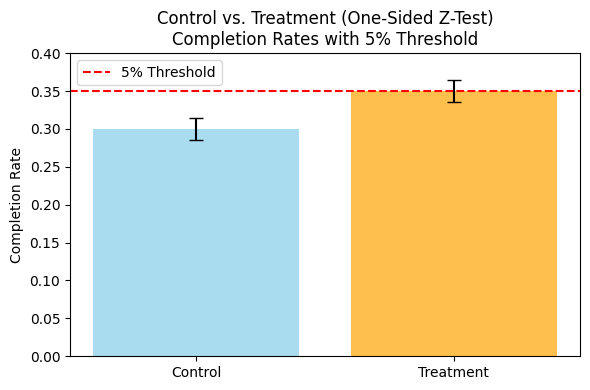

In [56]:
# Bar Plot Showing the Comparison
se_control = np.sqrt(p_control * (1 - p_control) / n_control)
se_treatment = np.sqrt(p_treatment * (1 - p_treatment) / n_treatment)

labels = ["Control", "Treatment"]
rates = [p_control, p_treatment]
errs = [se_control, se_treatment]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, rates, yerr=errs, capsize=5, alpha=0.7, color=["skyblue", "orange"])

# Adding a red dashed line showing p_control + 0.05
threshold_line = p_control + 0.05
plt.axhline(y=threshold_line, color='red', linestyle='--', label='5% Threshold')

plt.title("Control vs. Treatment (One-Sided Z-Test)\nCompletion Rates with 5% Threshold")
plt.ylabel("Completion Rate")
plt.legend()
plt.ylim([0, max(threshold_line, max(rates)) + 0.05])

plt.tight_layout()
plt.show()

### Gender differences affect engaging with the new or old process

In [57]:
# H0: Gender differences does not affect engaging with the new or old process
# H1: Gender differences is affecting engaging with the new or old process

In [58]:
client_df["gender"].value_counts()

gender
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [59]:
experiment_df

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [60]:
#Transforming the columns so they all have the same format
experiment_df.columns = [col.strip().lower() for col in experiment_df]
print(experiment_df.columns)

Index(['client_id', 'variation'], dtype='object')


In [61]:
experiment_df.nunique()

client_id    70609
variation        2
dtype: int64

In [62]:
experiment_df["variation"].value_counts()

variation
Test       26968
Control    23532
Name: count, dtype: int64

In [63]:
merged_df = pd.merge(client_df[['client_id', 'gender', 'age']], experiment_df[['client_id', 'variation']],
                     on='client_id', how='inner')

In [64]:
merged_df

,client_id,gender,age,variation
0,836976,U,60.5,Test
1,2304905,U,58.0,Control
2,1439522,U,32.0,Test
3,1562045,M,49.0,Test
4,5126305,F,33.0,Control
...,...,...,...,...
70604,7993686,U,38.5,NaN
70605,8981690,M,31.0,NaN
70606,333913,F,61.5,NaN
70607,1573142,M,68.0,NaN


In [65]:
merged_df['variation'].unique()

array(['Test', 'Control', nan], dtype=object)

In [66]:
nan_count = merged_df['variation'].isnull().sum()
print(f"Number of NaN values in 'Variation': {nan_count}")

Number of NaN values in 'Variation': 20109


In [67]:
filtered_df = merged_df[merged_df['variation'].isin(['Test', 'Control'])]

print(filtered_df)

       client_id gender   age variation
0         836976      U  60.5      Test
1        2304905      U  58.0   Control
2        1439522      U  32.0      Test
3        1562045      M  49.0      Test
4        5126305      F  33.0   Control
...          ...    ...   ...       ...
50495    1780858      M  68.5      Test
50496    6967120      M  68.5   Control
50497    5826160      F  56.5      Test
50498    8739285      F  69.5      Test
50499    7468138      F  61.0      Test

[50500 rows x 4 columns]


In [68]:
filtered_final_df = filtered_df[filtered_df['gender'].isin(['M', 'F'])]

print(filtered_final_df)

       client_id gender   age variation
3        1562045      M  49.0      Test
4        5126305      F  33.0   Control
7         388801      M  57.5      Test
8         285619      M  67.5   Control
9        8198645      F  54.5      Test
...          ...    ...   ...       ...
50495    1780858      M  68.5      Test
50496    6967120      M  68.5   Control
50497    5826160      F  56.5      Test
50498    8739285      F  69.5      Test
50499    7468138      F  61.0      Test

[33206 rows x 4 columns]


In [69]:
filtered_final_df['gender'].value_counts()

gender
M    16947
F    16259
Name: count, dtype: int64

In [70]:
filtered_final_df.to_excel('gender.xlsx', index=False)

In [71]:
contingency_table = pd.crosstab(filtered_final_df['gender'], filtered_final_df['variation'])
contingency_table

variation,Control,Test
gender,,
F,7543,8716
M,7970,8977


In [72]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, p-value: {p}")

Chi2 Statistic: 1.3238390535392106, p-value: 0.24990422113564786


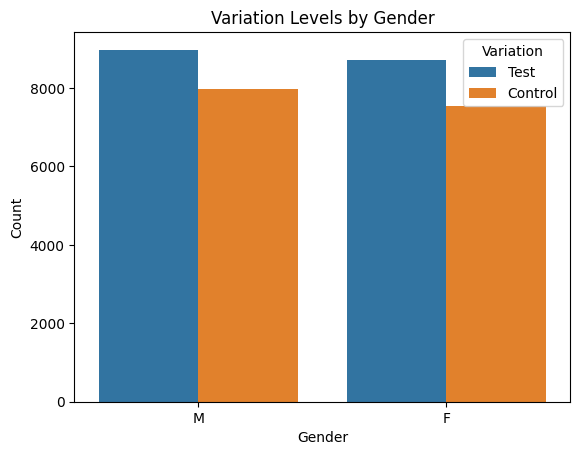

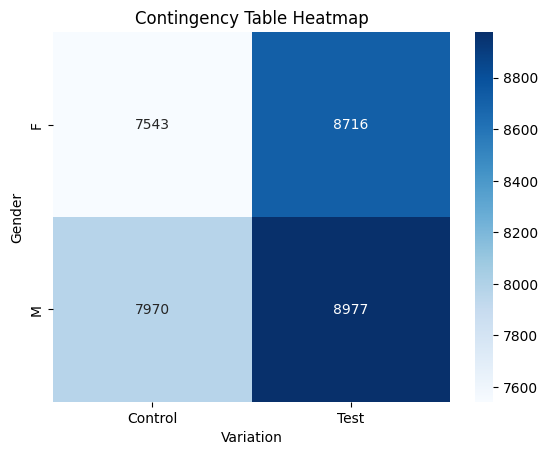

In [73]:
# Bar Plot
sns.countplot(data=filtered_final_df, x='gender', hue='variation')
plt.title('Variation Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Variation')
plt.show()

# Heatmap of Contingency Table
contingency_table = pd.crosstab(filtered_final_df['gender'], filtered_final_df['variation'])
sns.heatmap(contingency_table, annot=True, fmt="d", cmap='Blues')
plt.title('Contingency Table Heatmap')
plt.ylabel('Gender')
plt.xlabel('Variation')
plt.show()

After performing the chi-square test, we cannot reject the H0 hypothesis.
Based on the Chi2 statistic of 1.324 and p-value of 0.25, we can conclude that gender differences 
it does not affect inclusion in the new or old process, and the visualization shows how evenly distributed the data is.

Based on the Chi-square test, with a Chi2 statistic of 1.324 and a p-value of 0.25, we cannot reject the null hypothesis. This suggests that gender differences do not significantly affect whether individuals are included in the new or old process. The data visualization further supports this conclusion by showing an even distribution.